In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
from itertools import tee

In [2]:
#Creating network
seed = 14
n = 500
m = 5
N_1 = nx.barabasi_albert_graph(n, m, seed)
N_2 = nx.barabasi_albert_graph(n, m, seed)
N_3 = nx.barabasi_albert_graph(n, m, seed)
N_4 = nx.barabasi_albert_graph(n, m, seed)
N_5 = nx.barabasi_albert_graph(n, m, seed)
N_6 = nx.barabasi_albert_graph(n, m, seed)

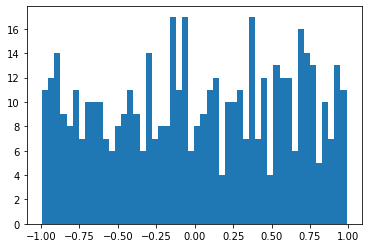

In [3]:
#Initializing set of opinions
initial_opinions = np.random.uniform(-1.0, 1.0, n)
plt.figure()
plt.hist(initial_opinions, bins = 50)
plt.show()

In [4]:
#Make the opinions a dictionary
#Make the perceptions a dictionary
#In the beginning, each node's perception is its own opinion
opinions = {}
perceptions = {}
for node in N_1:
    opinions[node] = initial_opinions[node]
    perceptions[node] = initial_opinions[node]
        
#Assign opinions and perceptions to nodes
nx.set_node_attributes(N_1, opinions, "opinion")
nx.set_node_attributes(N_1, perceptions, "perception")

In [5]:
#probability selection functions
def pref_attach_opinion(network, sample, k):
    #get the opinions 
    opinions = {}
    opinion = 0
    people = []
    for person in sample:
        opinion = network.nodes[person]['opinion']
        opinions[person] = opinion
        people.append(person)
    #Now we need to select
    opinions_absolute_values = [abs(op) for op in list(opinions.values())]
    opinion_sum = sum(opinions_absolute_values)
    opinions_probabilities = []
    probability = 0
    for person in people:
        their_opinion_abs = abs(network.nodes[person]['opinion'])
        probability = their_opinion_abs/(opinion_sum)
        opinions_probabilities.append(probability)
    
    opinions_exposed = random.choices(list(opinions.values()), weights=opinions_probabilities, k=k)
    
    
    return opinions_exposed

#uniform probability function
def uniform_opinion(network, sample, k):
    #get the opinions
    opinions = {}
    opinion = 0
    for person in sample:
        opinion = network.nodes[person]['opinion']
        opinions[person] = opinion
       
    #give everything equal weight
    opinions_exposed = random.choices(list(opinions.values()),  k=k)
    return opinions_exposed

In [42]:
#big fancy function

#exposure method: preferential attachment
#initial opinions: random uniform
#intial perceptions: initial opinions
def simulate_1(network, num_rounds, opinions_per_round):
    initial_opinions = np.random.uniform(-1.0, 1.0, network.number_of_nodes())
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
        perceptions[node] = initial_opinions[node]
        
    #Assign opinions and perceptions to nodes
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    
    #visualize initial perceptions
    #print("Perception Shift")
    #print("Opinion Exposure Method: Preferential")
    #print("Initial Opinions: Random Uniform")
    #print("Initial Perceptions = Initial Opinions")
    #plt.figure()
    #plt.hist(initial_opinions, bins=100)
    #plt.show()
    
    #rounds of exposure
    for node in network:
        total_opinions_exposed = []
        #rounds of exposure
        for i in range(0, num_rounds):
            #get the neighbors - have to do this in every round bc it returns an iterator
            neighbors = network.neighbors(node)
            opinions_exposed = pref_attach_opinion(network, neighbors, opinions_per_round)
            for opinion in opinions_exposed:
                total_opinions_exposed.append(opinion)
        #Take the average opinion
        average_opinion = sum(total_opinions_exposed)/len(total_opinions_exposed)
        #Update that nodes perception
        perceptions[node] = average_opinion
    
    
    
    #visualize final perceptions
    #plt.figure()
    #plt.hist(list(perceptions.values()), bins=100)
    #plt.show()
    
    #get the average perception magnitude
    perception_abs = [abs(per) for per in list(perceptions.values())]
    
    average_perception = sum(perception_abs)/len(perceptions)
    
    return num_rounds, average_perception

In [43]:
simulate_1(N_1, 100, 1)

(100, 0.2512587932430805)

In [29]:
#big fancy function

#exposure method: random uniform
#initial opinions: random uniform
#initial perceptions: initial opinions
def simulate_2(network, num_rounds, opinions_per_round):
    initial_opinions = np.random.uniform(-1.0, 1.0, network.number_of_nodes())
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
        perceptions[node] = initial_opinions[node]
        
    #Assign opinions and perceptions to nodes
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    
    #visualize initial perceptions
    #print("Perception Shift")
    #print("Opinion Exposure Method: Random Uniform")
    #print("Initial Opinions: Random Uniform")
    #print("Initial Perceptions = Initial Opinions")
    #plt.figure()
    #plt.hist(initial_opinions, bins=100)
    #plt.show()
    
    #rounds of exposure
    for node in network:
        total_opinions_exposed = []
        #rounds of exposure
        for i in range(0, num_rounds):
            #get the neighbors - have to do this in every round bc it returns an iterator
            neighbors = network.neighbors(node)
            opinions_exposed = uniform_opinion(network, neighbors, opinions_per_round)
            for opinion in opinions_exposed:
                total_opinions_exposed.append(opinion)
        #Take the average opinion
        average_opinion = sum(total_opinions_exposed)/len(total_opinions_exposed)
        #Update that nodes perception
        perceptions[node] = average_opinion
        
    #visualize final perceptions
    #plt.figure()
    #plt.hist(list(perceptions.values()), bins=100)
    #plt.show()
    
    #get the average perception
    average_perception = sum(perceptions.values())/len(perceptions)
    
    return num_rounds, average_perception

In [30]:
simulate_2(N_2, 50, 1)

(50, 0.0024382561756349937)

In [10]:
#big fancy function

#exposure method: preferential attachment
#initial opinions: Gaussian
#initial perceptions: initial opinions

def simulate_3(network, num_rounds, opinions_per_round):
    initial_opinions = np.random.normal(scale=.4,size=network.number_of_nodes())
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
        perceptions[node] = initial_opinions[node]
        
    #Assign opinions and perceptions to nodes
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    
    #visualize initial perceptions
    print("Perception Shift")
    print("Opinion Exposure Method: Preferential")
    print("Initial Opinions: Gaussian")
    print("Initial Perceptions = Initial Opinions")
    plt.figure()
    plt.hist(initial_opinions, bins=100)
    plt.show()
    
    #rounds of exposure
    for node in network:
        total_opinions_exposed = []
        #rounds of exposure
        for i in range(0, num_rounds):
            #get the neighbors - have to do this in every round bc it returns an iterator
            neighbors = network.neighbors(node)
            opinions_exposed = pref_attach_opinion(network, neighbors, opinions_per_round)
            for opinion in opinions_exposed:
                total_opinions_exposed.append(opinion)
        #Take the average opinion
        average_opinion = sum(total_opinions_exposed)/len(total_opinions_exposed)
        #Update that nodes perception
        perceptions[node] = average_opinion
        
    #visualize final perceptions
    plt.figure()
    plt.hist(list(perceptions.values()), bins=100)
    plt.show()
    
    #get the average perception
    average_perception = sum(perceptions.values())/len(perceptions)
    
    return num_rounds, average_perception

Perception Shift
Opinion Exposure Method: Preferential
Initial Opinions: Gaussian
Initial Perceptions = Initial Opinions


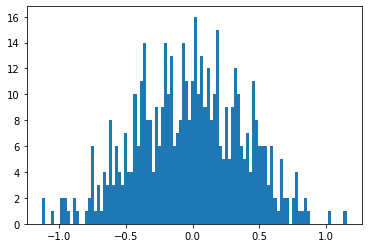

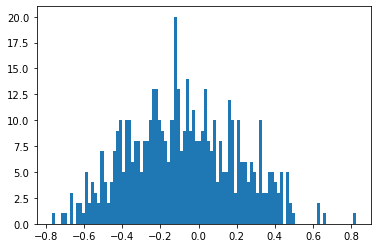

(100, -0.08059941552315202)

In [11]:
simulate_3(N_3, 100, 1)

In [12]:
#big fancy function

#exposure method: uniform random
#initial opinions: Gaussian
#initial perceptions: initial opinions

def simulate_4(network, num_rounds, opinions_per_round):
    initial_opinions = np.random.normal(scale=.4,size=network.number_of_nodes())
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
        perceptions[node] = initial_opinions[node]
        
    #Assign opinions and perceptions to nodes
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    
    #visualize initial perceptions
    print("Perception Shift")
    print("Opinion Exposure Method: Uniform Random")
    print("Initial Opinions: Gaussian")
    print("Initial Perceptions = Initial Opinions")
    plt.figure()
    plt.hist(initial_opinions, bins=100)
    plt.show()
    
    #rounds of exposure
    for node in network:
        total_opinions_exposed = []
        #rounds of exposure
        for i in range(0, num_rounds):
            #get the neighbors - have to do this in every round bc it returns an iterator
            neighbors = network.neighbors(node)
            opinions_exposed = uniform_opinion(network, neighbors, opinions_per_round)
            for opinion in opinions_exposed:
                total_opinions_exposed.append(opinion)
        #Take the average opinion
        average_opinion = sum(total_opinions_exposed)/len(total_opinions_exposed)
        #Update that nodes perception
        perceptions[node] = average_opinion
        
    #visualize final perceptions
    plt.figure()
    plt.hist(list(perceptions.values()), bins=100)
    plt.show()
    
    #get the average perception
    average_perception = sum(perceptions.values())/len(perceptions)
    
    return num_rounds, average_perception

Perception Shift
Opinion Exposure Method: Uniform Random
Initial Opinions: Gaussian
Initial Perceptions = Initial Opinions


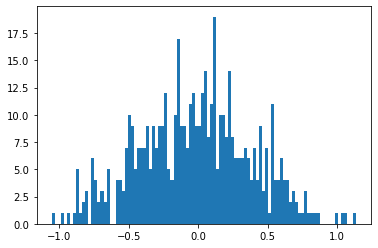

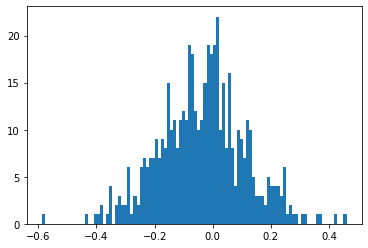

(100, -0.035975473367833896)

In [13]:
simulate_4(N_4, 100, 1)

In [37]:
#big fancy function

#exposure method: preferential attachment
#initial opinions: random uniform
#intial perceptions: average of neighbor's opinion
def simulate_5(network, num_rounds, opinions_per_round):
    initial_opinions = np.random.uniform(-1.0, 1.0, network.number_of_nodes())
    opinions = {}
    perceptions = {}
    for node in network:
        opinions[node] = initial_opinions[node]
    
    #now assign initial perceptions as average of neighbors opinions
    for node in network:
        neighbors = network.neighbors(node)
        total_opinion = 0
        num_neighbors = 0
        for neighbor in neighbors:
            total_opinion += opinions[neighbor]
            num_neighbors += 1
        avg_opinion = total_opinion/num_neighbors
        perceptions[node] = avg_opinion
            
    
    
    #Assign opinions and perceptions to nodes
    nx.set_node_attributes(network, opinions, "opinion")
    nx.set_node_attributes(network, perceptions, "perception")
    
    #visualize initial perceptions
    print("Perception Shift")
    print("Opinion Exposure Method: Preferential")
    print("Initial Opinions: Random Uniform")
    print("Initial Perceptions = Average of Neighbor's Opinions")
    plt.figure()
    plt.hist(list(perceptions.values()), bins=100)
    plt.show()
    
    #rounds of exposure
    for node in network:
        total_opinions_exposed = []
        #rounds of exposure
        for i in range(0, num_rounds):
            #get the neighbors - have to do this in every round bc it returns an iterator
            neighbors = network.neighbors(node)
            opinions_exposed = pref_attach_opinion(network, neighbors, opinions_per_round)
            for opinion in opinions_exposed:
                total_opinions_exposed.append(opinion)
        #Take the average opinion
        average_opinion = sum(total_opinions_exposed)/len(total_opinions_exposed)
        #Update that nodes perception
        perceptions[node] = average_opinion
        
    #visualize final perceptions
    plt.figure()
    plt.hist(list(perceptions.values()), bins=100)
    plt.show()
    
    #get the average perception
    average_perception = sum(perceptions.values())/len(perceptions)
    
    return num_rounds, average_perception

Perception Shift
Opinion Exposure Method: Preferential
Initial Opinions: Random Uniform
Initial Perceptions = Average of Neighbor's Opinions


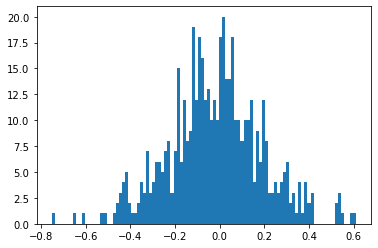

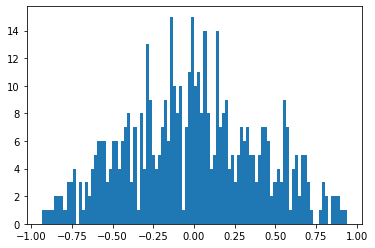

(5, -0.011303668923741987)

In [41]:
simulate_5(N_5, 5, 1)

In [16]:
#Notes on how to implement next part
#Give each of these functions an output - maybe a tuple with the number of iterations and the average absolute value of perception
#Make another function that runs the simulations with different numbers of iterations and plots the average perception vs. number of iterations
#once this is running, have the simulations return average opinions too, plot opinions and perceptions on the same graph to see how they diverge

In [44]:
def simulate_1_over_time(network, max_num_rounds, opinions_per_round):
    i = 1
    perceptions = []
    rounds = []
    
    print("Average Perception vs. Number of Exposure Rounds")
    print("Opinion Exposure Method: Preferential")
    print("Initial Opinions: Random Uniform")
    print("Initial Perceptions = Initial Opinions")
    
    #run the simulation with an increasing number of exposure rounds
    while (i <= max_num_rounds):
        num_rounds, average_perception = simulate_1(network, i, opinions_per_round)
        rounds.append(num_rounds)
        perceptions.append(abs(average_perception))
        i += 1
    
    #visualize how the average perception changes with the number of rounds
    plt.figure()
    plt.plot(rounds, perceptions)
    plt.title("Average Perception vs. Number of Rounds")
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Perception at Conclusion")
    #plt.xticks(rounds)
    plt.show()

Average Perception vs. Number of Exposure Rounds
Opinion Exposure Method: Preferential
Initial Opinions: Random Uniform
Initial Perceptions = Initial Opinions


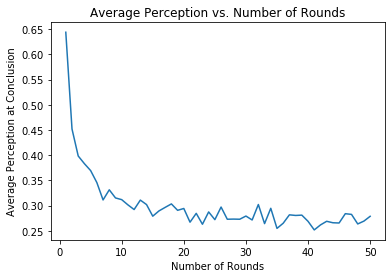

In [45]:
simulate_1_over_time(N_1, 50, 1)

In [35]:
def simulate_2_over_time(network, max_num_rounds, opinions_per_round):
    i = 1
    perceptions = []
    rounds = []
    
    print("Average Perception vs. Number of Exposure Rounds")
    print("Opinion Exposure Method: Random Uniform")
    print("Initial Opinions: Random Uniform")
    print("Initial Perceptions = Initial Opinions")
    
    #run the simulation with an increasing number of exposure rounds
    while (i <= max_num_rounds):
        num_rounds, average_perception = simulate_2(network, i, opinions_per_round)
        rounds.append(num_rounds)
        perceptions.append(abs(average_perception))
        i += 1
    
    #visualize how the average perception changes with the number of rounds
    plt.figure()
    plt.plot(rounds, perceptions)
    plt.title("Average Perception vs. Number of Rounds")
    plt.xlabel("Number of Rounds")
    plt.ylabel("Average Perception at Conclusion")
    #plt.xticks(rounds)
    plt.show()

Average Perception vs. Number of Exposure Rounds
Opinion Exposure Method: Random Uniform
Initial Opinions: Random Uniform
Initial Perceptions = Initial Opinions


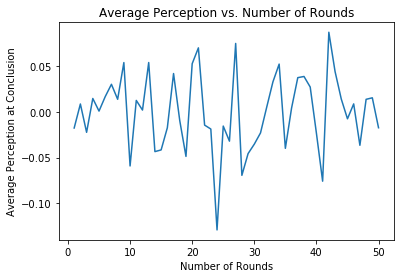

In [31]:
simulate_2_over_time(N_1, 50, 1)